## Dataset Overview
This dataset contains daily COVID-19 statistics at the country level, including confirmed cases, deaths, recoveries, active cases, and daily new values. The data spans 188 dates and 187 countries, enabling global and regional time-series analysis.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
df = pd.read_csv("full_grouped.csv")

In [5]:
df.head()
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
count,35156,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000,35156
unique,188,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,2020-01-22,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,187,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10528
mean,NaN,NaN,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593,NaN
std,NaN,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852,NaN
min,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000,NaN
25%,NaN,NaN,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,NaN
50%,NaN,NaN,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000,NaN
75%,NaN,NaN,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000,NaN


In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Country/Region", "Date"]).reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


The Date column was converted to datetime format and the dataset was sorted by country and date to support time-series operations.

In [6]:
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [17]:
(df[["New cases", "New deaths", "New recovered"]] < 0).sum()



New cases         0
New deaths       38
New recovered    77
dtype: int64

In [9]:
df.isna().sum()


Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [19]:
global_daily = (
    df.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active",
                        "New cases", "New deaths", "New recovered"]]
      .sum()
      .reset_index()
)

global_daily.head()


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,555,17,28,510,0,0,0
1,2020-01-23,654,18,30,606,99,1,2
2,2020-01-24,941,26,36,879,287,8,6
3,2020-01-25,1434,42,39,1353,493,16,3
4,2020-01-26,2118,56,52,2010,684,14,13


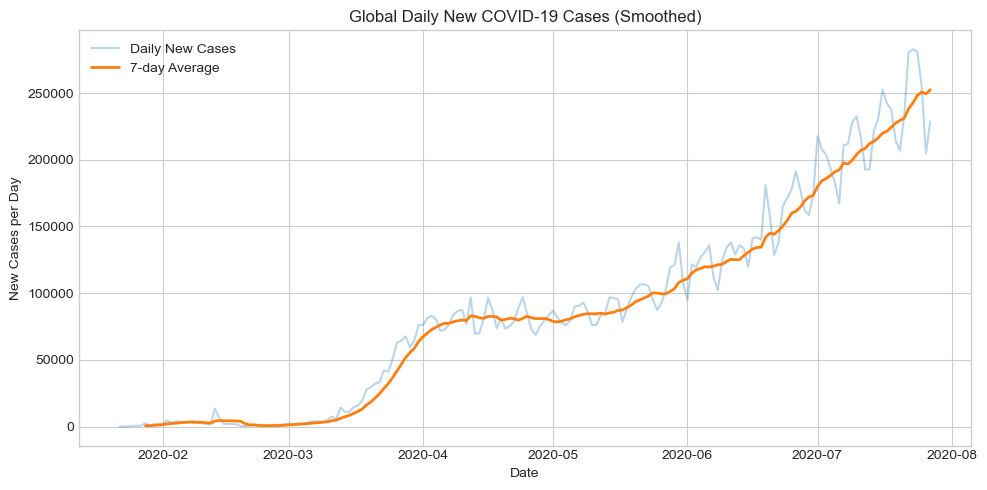

In [21]:
global_daily["New_cases_7day_avg"] = global_daily["New cases"].rolling(7).mean()

plt.figure(figsize=(10, 5))
plt.plot(global_daily["Date"], global_daily["New cases"], alpha=0.3, label="Daily New Cases")
plt.plot(global_daily["Date"], global_daily["New_cases_7day_avg"], linewidth=2, label="7-day Average")
plt.title("Global Daily New COVID-19 Cases (Smoothed)")
plt.xlabel("Date")
plt.ylabel("New Cases per Day")
plt.legend()
plt.tight_layout()
plt.show()


This plot shows the daily number of new COVID-19 cases globally. The faint line represents raw daily values, which are noisy due to reporting variability. The bold 7-day moving average smooths out short-term fluctuations and reveals the underlying growth and decline phases of the pandemic.

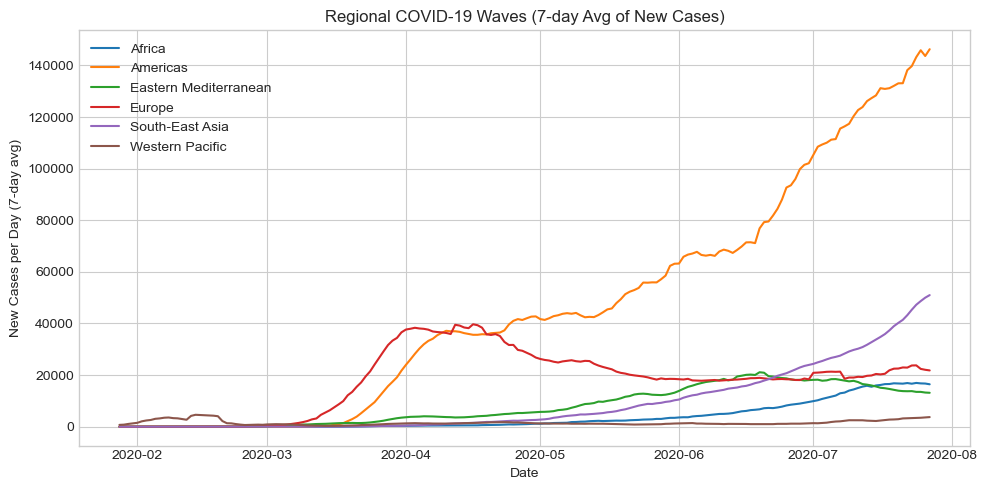

In [23]:
regional_daily = (
    df.groupby(["Date", "WHO Region"])["New cases"]
      .sum()
      .reset_index()
)

regional_daily["New_cases_7day_avg"] = (
    regional_daily
      .groupby("WHO Region")["New cases"]
      .rolling(7)
      .mean()
      .reset_index(level=0, drop=True)
)

plt.figure(figsize=(10, 5))
for region in regional_daily["WHO Region"].unique():
    r = regional_daily[regional_daily["WHO Region"] == region]
    plt.plot(r["Date"], r["New_cases_7day_avg"], label=region)

plt.title("Regional COVID-19 Waves (7-day Avg of New Cases)")
plt.xlabel("Date")
plt.ylabel("New Cases per Day (7-day avg)")
plt.legend()
plt.tight_layout()
plt.show()


This stacked area chart shows how different WHO regions contributed to global daily new COVID-19 cases over time.

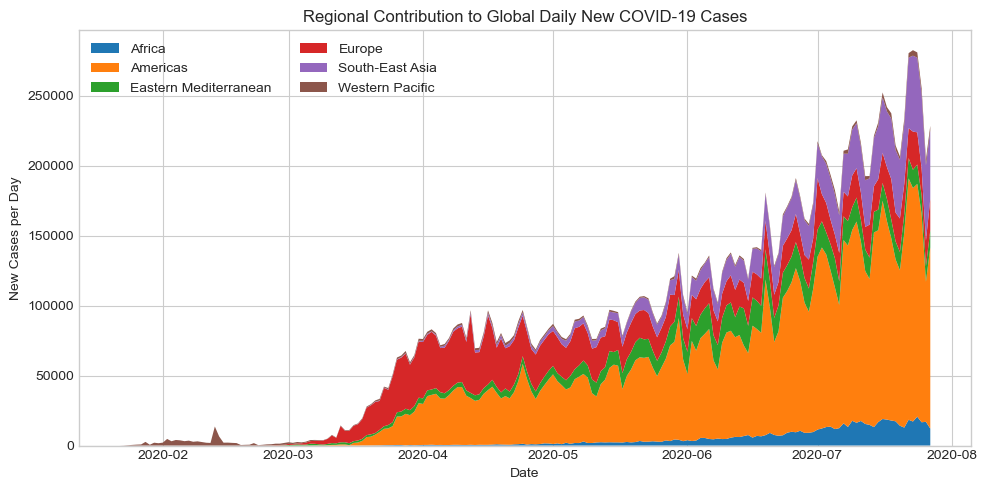

In [25]:
# Aggregate by date & region
regional_daily = (
    df.groupby(["Date", "WHO Region"])["New cases"]
      .sum()
      .reset_index()
)

# Pivot for stacked area
pivot = regional_daily.pivot(index="Date", columns="WHO Region", values="New cases").fillna(0)

plt.figure(figsize=(10, 5))
plt.stackplot(pivot.index, pivot.T, labels=pivot.columns)
plt.title("Regional Contribution to Global Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases per Day")
plt.legend(loc="upper left", ncol=2)
plt.tight_layout()
plt.show()


This stacked area chart shows how different WHO regions contributed to global daily new COVID-19 cases over time. The total height represents global new cases each day, while each colored region shows its share of that total.

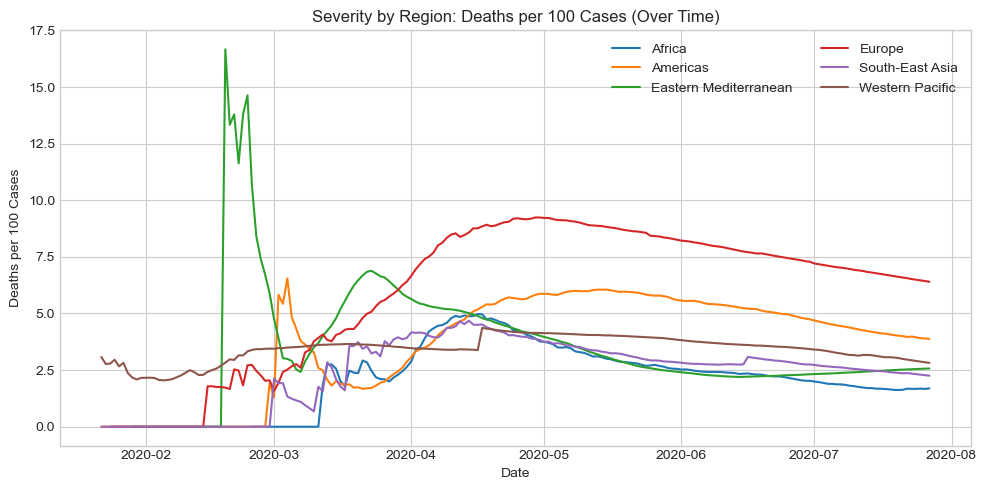

In [27]:
regional_rates = (
    df.groupby(["Date", "WHO Region"])[["Deaths", "Confirmed"]]
      .sum()
      .reset_index()
)
regional_rates["Deaths_per_100"] = 100 * regional_rates["Deaths"] / regional_rates["Confirmed"]

plt.figure(figsize=(10, 5))
for region in regional_rates["WHO Region"].unique():
    r = regional_rates[regional_rates["WHO Region"] == region]
    plt.plot(r["Date"], r["Deaths_per_100"], label=region)

plt.title("Severity by Region: Deaths per 100 Cases (Over Time)")
plt.xlabel("Date")
plt.ylabel("Deaths per 100 Cases")
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


This plot shows the case fatality ratio (deaths per 100 confirmed cases) over time for each WHO region.

In [47]:
import plotly.express as px

latest = df.sort_values("Date").groupby("Country/Region").tail(1)

fig = px.treemap(
    latest,
    path=["WHO Region", "Country/Region"],
    values="Confirmed",
    hover_data={"Confirmed": ":,"},
    title="COVID-19 Case Distribution by Region and Country (Latest Snapshot)"
)
fig.show()


In [ ]:
This chart shows the countries with the highest total COVID-19 cases in the latest snapshot, colored by